<a href="https://colab.research.google.com/github/adeeb123-crypto/coding-bootcamp/blob/master/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.stem import PorterStemmer


In [0]:
data= pd.read_csv('/content/drive/My Drive/Hotel_Reviews.csv')

In [0]:
data.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [0]:
data.shape

(515738, 17)

In [0]:
data.shape

(515738, 17)

In [0]:
data.info

<bound method DataFrame.info of                                             Hotel_Address  ...        lng
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
5        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
6        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
7        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
8        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
9        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
10       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
11       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
12    

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
Hotel_Address                                 515738 non-null object
Additional_Number_of_Scoring                  515738 non-null int64
Review_Date                                   515738 non-null object
Average_Score                                 515738 non-null float64
Hotel_Name                                    515738 non-null object
Reviewer_Nationality                          515738 non-null object
Negative_Review                               515738 non-null object
Review_Total_Negative_Word_Counts             515738 non-null int64
Total_Number_of_Reviews                       515738 non-null int64
Positive_Review                               515738 non-null object
Review_Total_Positive_Word_Counts             515738 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    515738 non-null int64
Reviewer_Score                                515738 non-null flo

In [0]:
data.loc[6789]

Hotel_Address                                 1 Addington Street Lambeth London SE1 7RY Unit...
Additional_Number_of_Scoring                                                               1322
Review_Date                                                                           11/4/2016
Average_Score                                                                               8.4
Hotel_Name                                                        Park Plaza County Hall London
Reviewer_Nationality                                                                     Italy 
Negative_Review                                                                     No Negative
Review_Total_Negative_Word_Counts                                                             0
Total_Number_of_Reviews                                                                    6117
Positive_Review                                                 Atmosphere is great like family
Review_Total_Positive_Word_Counts       

In [0]:
data.loc[1]

Hotel_Address                                  s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
Additional_Number_of_Scoring                                                                194
Review_Date                                                                            8/3/2017
Average_Score                                                                               7.7
Hotel_Name                                                                          Hotel Arena
Reviewer_Nationality                                                                   Ireland 
Negative_Review                                                                     No Negative
Review_Total_Negative_Word_Counts                                                             0
Total_Number_of_Reviews                                                                    1403
Positive_Review                                No real complaints the hotel was great great ...
Review_Total_Positive_Word_Counts       

In [0]:
data.loc[2]

Hotel_Address                                  s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
Additional_Number_of_Scoring                                                                194
Review_Date                                                                           7/31/2017
Average_Score                                                                               7.7
Hotel_Name                                                                          Hotel Arena
Reviewer_Nationality                                                                 Australia 
Negative_Review                                Rooms are nice but for elderly a bit difficul...
Review_Total_Negative_Word_Counts                                                            42
Total_Number_of_Reviews                                                                    1403
Positive_Review                                Location was good and staff were ok It is cut...
Review_Total_Positive_Word_Counts       

In [0]:
data["Hotel_Address"][0:10]

0     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
1     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
2     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
3     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
4     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
5     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
6     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
7     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
8     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
9     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
Name: Hotel_Address, dtype: object

In [0]:
data.dropna

<bound method DataFrame.dropna of                                             Hotel_Address  ...        lng
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
5        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
6        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
7        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
8        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
9        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
10       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
11       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  ...   4.915968
12  

In [0]:
hello

NameError: ignored

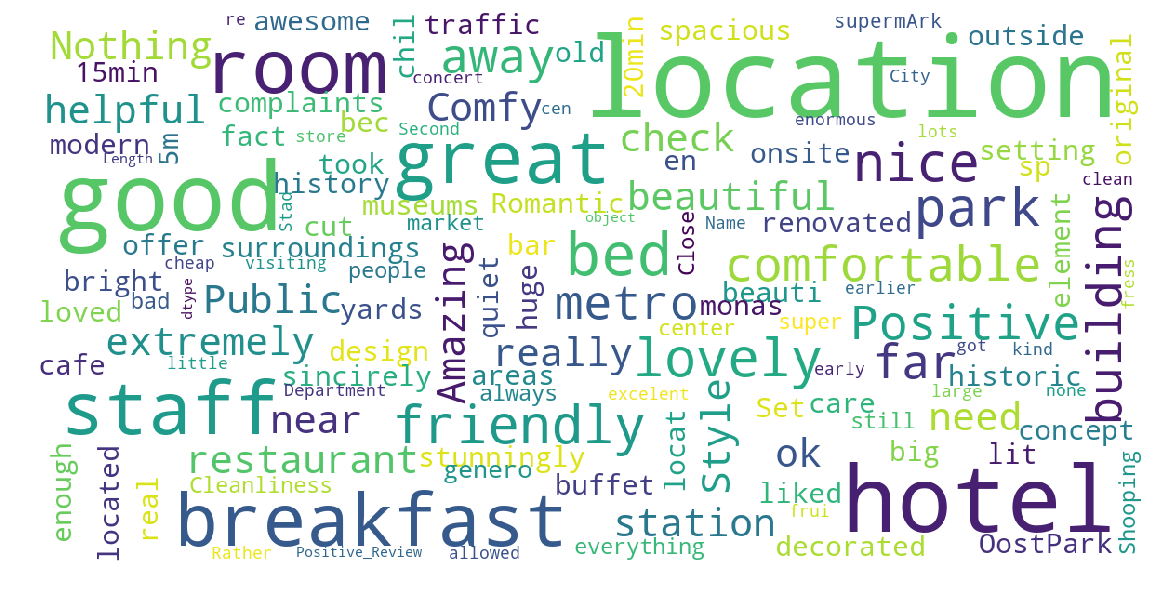

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title= None):
  wordcloud = WordCloud(
        background_color= "white" ,
        max_words= 200,
        max_font_size= 40,
        scale= 3,
        random_state= 42
       ).generate(str(data))
  
  fig = plt.figure(1, figsize = (20,20))
  plt.axis('off')
  if title:
      fig.suptitle(title, fontsize= 20)
      fig.subplot_adjust(top = 2.3)
  
  plt.imshow(wordcloud)
  plt.show()
  
show_wordcloud(data["Positive_Review"])
  

In [0]:
positive_reviews= data["Positive_Review"][:5000]

In [0]:
positive_reviews

0        Only the park outside of the hotel was beauti...
1        No real complaints the hotel was great great ...
2        Location was good and staff were ok It is cut...
3        Great location in nice surroundings the bar a...
4         Amazing location and building Romantic setting 
5        Good restaurant with modern design great chil...
6        The room is spacious and bright The hotel is ...
7        Good location Set in a lovely park friendly s...
8                                             No Positive
9        The room was big enough and the bed is good T...
10       Rooms were stunningly decorated and really sp...
11                                   Style location rooms
12                               Comfy bed good location 
13       This hotel is being renovated with great care...
14       It was very good very historic building that ...
15       This hotel is awesome I took it sincirely bec...
16       Great onsite cafe Amazing building Park locat...
17       We lo

In [0]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def preProcess(text):
  #to remove HTML tags
  text = re.sub('<.*?>',' ',str(text))
  
  #removes all special characters
  text= re.sub('[^A-Za-z0-9]+',' ',text)
  text= re.sub("\d+", "",text)
  
  text_list= text.lower().split()
  
  english_stop_words= set(stopwords.words('english'))
  
  text_list = [word for word in text_list if word not in english_stop_words]
  #removes all stopwords
  text_list= [ps.stem(word) for word in text_list]
  #stemmming
  
  return ' '.join(text_list)
  

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
positive_reviews=positive_reviews.apply(preProcess)

In [0]:
positive_reviews

0                                park outsid hotel beauti
1       real complaint hotel great great locat surroun...
2       locat good staff ok cute hotel breakfast rang ...
3       great locat nice surround bar restaur nice lov...
4                             amaz locat build romant set
5       good restaur modern design great chill place g...
6       room spaciou bright hotel locat quiet beauti park
7       good locat set love park friendli staff food h...
8                                                   posit
9       room big enough bed good breakfast food servic...
10      room stunningli decor realli spaciou top build...
11                                       style locat room
12                                   comfi bed good locat
13      hotel renov great care appreci uniqu structur ...
14                                good histor build chose
15      hotel awesom took sincir bit cheaper structur ...
16      great onsit cafe amaz build park locat amaz bo...
17      love l

In [0]:
vectorizer= TfidfVectorizer()

In [0]:
matrix= vectorizer.fit_transform(positive_reviews)


In [0]:
word_feature = vectorizer.get_feature_names()

In [0]:
print(len(word_feature))

3113
